In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("/Users/olivia/Downloads/SG Media Analyst - Candidate Assessment Sample Data.xlsx")

In [2]:
df.head()

,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,Language,...,Facebook Social Echo,Reddit Social Echo,National Viewership,Engagement,AVE,Sentiment,Key Phrases,Input Name,Keywords,Document Tags
0,31-Dec-2019 09:02PM,Grab Begins Refunding Passengers In Compliance...,https://www.cosmo.ph/news/grab-refunding-passe...,Were you one of the many Grab users who got th...,is proportionally distributing the amount of P...,Cosmopolitan Philippines,Monina Eugenio,Philippines,NaN,English,...,28,0,0,NaN,10945.54,Neutral,"hailing app Grab,many Grab users,Begins Refund...",Adhoc Search Export,"GrabCar,GrabPay",NaN
1,31-Dec-2019 09:02PM,Di penghujung perlumbaan hidup,https://www.sinarharian.com.my/article/64087/K...,OLEH kerana hampir semua daripada kita menggun...,yang dinamakan Libra.\nPerkhidmatan memesan ma...,Sinar Harian,NORDEN MOHAMED,Malaysia,NaN,Malay,...,33,0,0,NaN,16813.23,Not Rated,NaN,Adhoc Search Export,Grabfood,NaN
2,31-Dec-2019 08:41PM,"Digugat Rp 1,12 Miliar oleh Kedai Kopi, Grab T...",https://bisnis.tempo.co/read/1289719/digugat-r...,"TEMPO.CO, Jakarta - Manajemen PT Solusi Transp...","serta proses hukum yang akan berlangsung, ujar...",Tempo.co,Reporter: Francisca Christy Rosana,Indonesia,NaN,Indonesian,...,10220,0,0,NaN,101002.21,Not Rated,NaN,Adhoc Search Export,GrabFood,NaN
3,31-Dec-2019 07:50PM,Aplikasi Digital Tol Laut Permudah Masyarakat ...,https://akurat.co/ekonomi/id-934269-read-aplik...,AKURAT.CO Menteri Perhubungan Budi Karya Sumad...,"tol laut itu harus mudah, sama kaya kita pesan...",Akurat.co,Andi Syafriadi,Indonesia,NaN,Indonesian,...,0,0,0,NaN,12596.36,Not Rated,NaN,Adhoc Search Export,grabfood,NaN
4,31-Dec-2019 07:34PM,Cần 'giải mã' những khoản vay nước ngoài ở Gra...,http://netnews.vn/Can-giai-ma-nhung-khoan-vay-...,Tình hình tài chính ở Grab Việt Nam đang thể h...,". Từ giao đồ ăn (Grab Food), giao nhận hàng (G...",netnews,NaN,Viet Nam,NaN,Vietnamese,...,0,0,0,NaN,6934.22,Not Rated,NaN,Adhoc Search Export,GrabPay,NaN


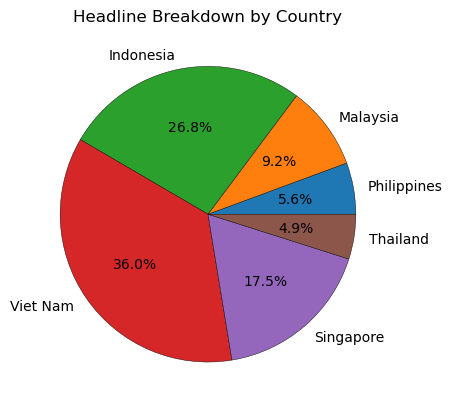

In [3]:
countries = df["Country"].tolist()
countries_dict = {}
for country in countries:
    countries_dict[country] = countries_dict.get(country, 0) + 1

country_names = list(countries_dict.keys())
country_count = list(countries_dict.values())

plt.pie(country_count, labels = country_names, autopct= "%1.1f%%", wedgeprops = {"edgecolor": "black", "linewidth": 0.3})
plt.title("Headline Breakdown by Country")
plt.savefig("pie_chart.png")

In [4]:
vietnam_total = len(df.loc[df["Country"] == "Viet Nam"])

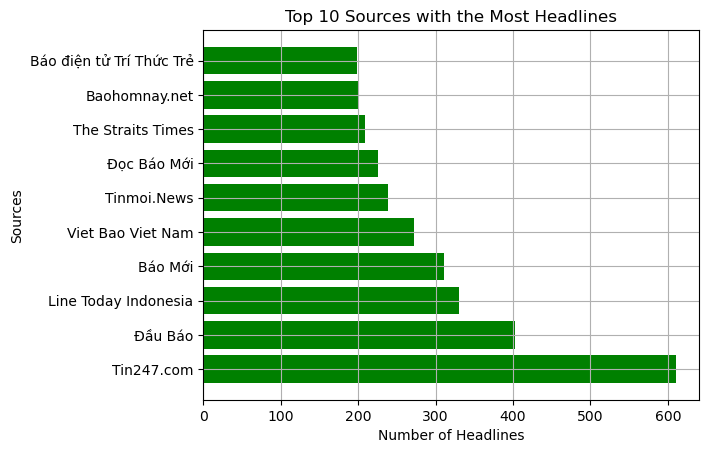

In [5]:
df["Source"].value_counts()
source = df["Source"].tolist()
source_dict = {}
for x in source:
    source_dict[x] = source_dict.get(x, 0)+ 1
    
source_sort = sorted([(v,k) for k,v in source_dict.items()], reverse = True)
source_final = source_sort[:10]
source_final = source_final

plt.grid()
plt.barh(y = [k for (v,k) in source_final], width = [v for (v,k) in source_final], color = "green")
plt.xlabel("Number of Headlines")
plt.ylabel("Sources")
plt.title("Top 10 Sources with the Most Headlines")
plt.savefig("bar_chart.png")

In [6]:
source_names = [k for (v,k) in source_final]
vietnam_sources = df.loc[df["Country"] == "Viet Nam"]["Source"].tolist()
for source in source_names:
    if source in vietnam_sources:
        print(f"{source}: Vietnamese")
    else:
        print(f"{source}: Not Vietnamese")

Tin247.com: Vietnamese
Đầu Báo: Vietnamese
Line Today Indonesia: Not Vietnamese
Báo Mới: Vietnamese
Viet Bao Viet Nam: Vietnamese
Tinmoi.News: Vietnamese
Đọc Báo Mới: Vietnamese
The Straits Times: Not Vietnamese
Baohomnay.net: Vietnamese
Báo điện tử Trí Thức Trẻ: Vietnamese


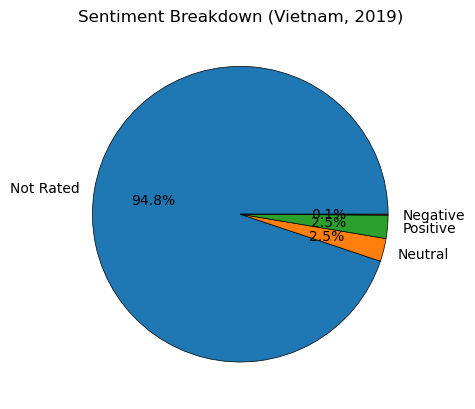

In [7]:
from collections import Counter
vietnam = df.loc[df["Country"] == "Viet Nam"]
vietnam_sents = vietnam["Sentiment"].tolist()
vietnam_sents_counted = Counter(vietnam_sents)
vietnam_sents_counted = dict(vietnam_sents_counted)
plt.pie([v for (k,v) in vietnam_sents_counted.items()], labels = [k for (k,v) in vietnam_sents_counted.items()], autopct = "%1.1f%%", wedgeprops = {"edgecolor": "black", "linewidth" : 0.5})
plt.title("Sentiment Breakdown (Vietnam, 2019)")
plt.savefig("vietnam_sent_2019.png")

In [8]:
len(df.loc[(df["Country"] == "Viet Nam") & (df["Sentiment"] == "Positive")])

171

Text(0.5, 1.0, 'Article Languages Used in Vietnam (2019)')

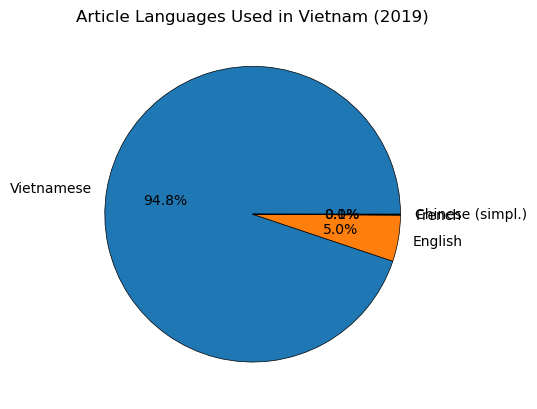

In [9]:
vietnam_languages = vietnam["Language"].tolist()
vietnam_languages = dict(Counter(vietnam_languages))
vietnam_languages

plt.pie(list(vietnam_languages.values()), labels = list(vietnam_languages.keys()), autopct = "%1.1f%%", wedgeprops = {"edgecolor":"black", "linewidth": 0.5})
plt.title("Article Languages Used in Vietnam (2019)")

In [10]:
vietnam_languages

{'Vietnamese': 6407, 'English': 341, 'French': 6, 'Chinese (simpl.)': 1}

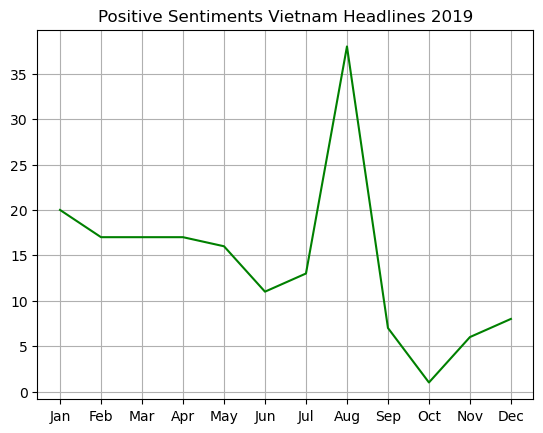

In [11]:
vietnam_sentiments = vietnam.loc[vietnam["Sentiment"] == "Positive"]
vietnam_dates = vietnam_sentiments["Date"].tolist()
vietnam_dates = [date.split()[0].split("-")[1] for date in vietnam_dates]
vietnam_dates_dict = {"Jan": 0, "Feb": 0, "Mar": 0, "Apr": 0, "May": 0, "Jun": 0, "Jul": 0, "Aug": 0, "Sep": 0, "Oct": 0, "Nov": 0, "Dec": 0}
for date in vietnam_dates:
    vietnam_dates_dict[date] = vietnam_dates_dict.get(date, 0) + 1

plt.title("Positive Sentiments Vietnam Headlines 2019")
plt.plot(list(vietnam_dates_dict.keys()), list(vietnam_dates_dict.values()), color = "green")
plt.grid()
plt.savefig("positive_sent_vietnam.png")

In [12]:
vietnam_dates_dict

{'Jan': 20,
 'Feb': 17,
 'Mar': 17,
 'Apr': 17,
 'May': 16,
 'Jun': 11,
 'Jul': 13,
 'Aug': 38,
 'Sep': 7,
 'Oct': 1,
 'Nov': 6,
 'Dec': 8}

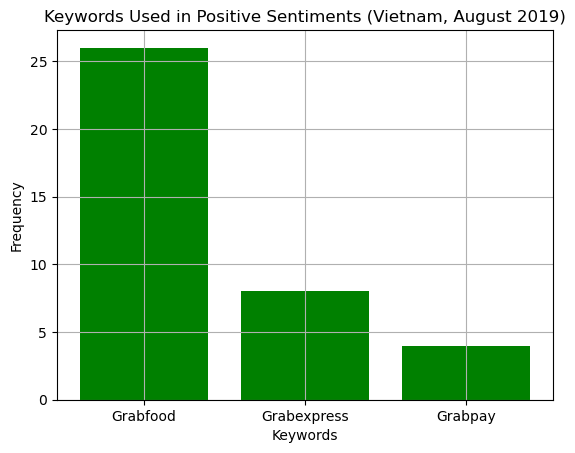

In [28]:
vietnam_aug = vietnam.loc[(vietnam['Date'].str.contains('Aug')) & (vietnam['Sentiment'] == 'Positive')]
vietnam_keywords = vietnam_aug["Keywords"].tolist()
vietnam_keywords_final = []
for keyword in vietnam_keywords:
    split = keyword.split(",")
    for x in split:
        vietnam_keywords_final.append(x.strip().title())
vietnam_keywords_counted = dict(Counter(vietnam_keywords_final))

plt.bar(x = list(vietnam_keywords_counted.keys()),height = list(vietnam_keywords_counted.values()), color = "green")
plt.title("Keywords Used in Positive Sentiments (Vietnam, August 2019)")
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.grid()

In [29]:
vietnam_keywords_counted

{'Grabfood': 26, 'Grabexpress': 8, 'Grabpay': 4}

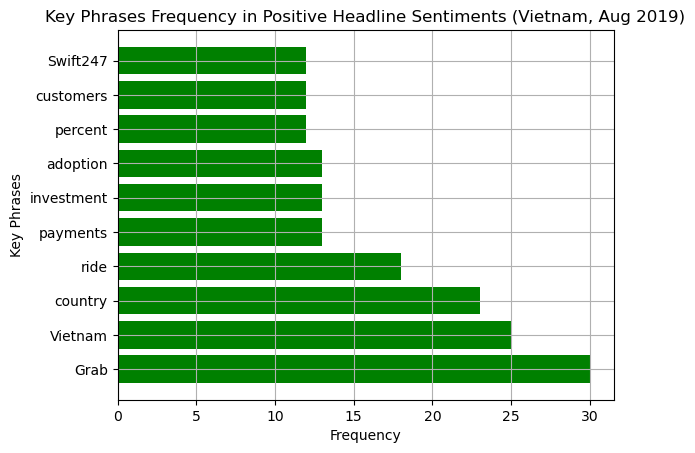

In [30]:
keyphrases = vietnam_aug["Key Phrases"].tolist()
keyphrases_list = []
for x in keyphrases:
    x = x.replace(",’","'")
    split = x.split(",")
    for phrase in split:
        keyphrases_list.append(phrase.strip())
counted_keyphrases = dict(Counter(keyphrases_list))
sorted_keyphrases = [(v,k) for (k,v) in counted_keyphrases.items()]
keyphrases_final = sorted(sorted_keyphrases, reverse = True)[:10]
keyphrases_final

plt.barh(width = [v for (v,k) in keyphrases_final], y = [k for (v,k) in keyphrases_final], color = "green")
plt.grid()
plt.xlabel("Frequency")
plt.ylabel("Key Phrases")
plt.title("Key Phrases Frequency in Positive Headline Sentiments (Vietnam, Aug 2019)")
plt.savefig("vietnam_keyphrases.png")

In [31]:
keyphrases_final

[(30, 'Grab'),
 (25, 'Vietnam'),
 (23, 'country'),
 (18, 'ride'),
 (13, 'payments'),
 (13, 'investment'),
 (13, 'adoption'),
 (12, 'percent'),
 (12, 'customers'),
 (12, 'Swift247')]

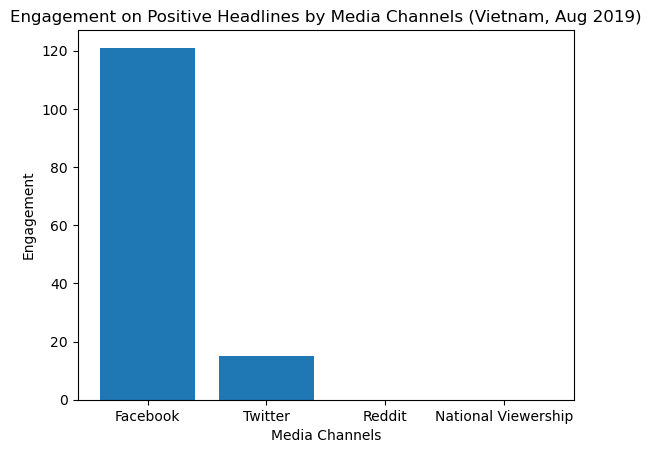

In [32]:
vietnam_facebook = vietnam_aug["Facebook Social Echo"].sum()
vietnam_reddit = vietnam_aug['Reddit Social Echo'].sum()
vietnam_viewership =  vietnam_aug['National Viewership'].sum()
vietnam_twitter = vietnam_aug["Twitter Social Echo"].sum()

plt.bar(x = ["Facebook", "Twitter", "Reddit", "National Viewership"], height = [vietnam_facebook, vietnam_twitter,vietnam_viewership, vietnam_reddit])
plt.xlabel("Media Channels")
plt.ylabel("Engagement")
plt.title("Engagement on Positive Headlines by Media Channels (Vietnam, Aug 2019)")
plt.savefig("media_channels.png")

In [33]:
print(f"Facebook: {vietnam_facebook}")
print(f"Twitter: {vietnam_twitter}")
print(f"Reddit: {vietnam_reddit}")
print(f"National Viewership: {vietnam_viewership}")

Facebook: 121
Twitter: 15
Reddit: 0
National Viewership: 0
